Class mapping: {0: 'apple', 1: 'banana', 2: 'chocolate', 3: 'waters'}
Model loaded successfully!


/home/licongcong/Desktop/backup/apple_image.jpg /home/licongcong/Desktop/backup/apple_image.jpg


Predicted category: apple
Category probabilities: [0.8930005  0.09728052 0.00786385 0.00185512]
Nutri-score from JSON: Unknown


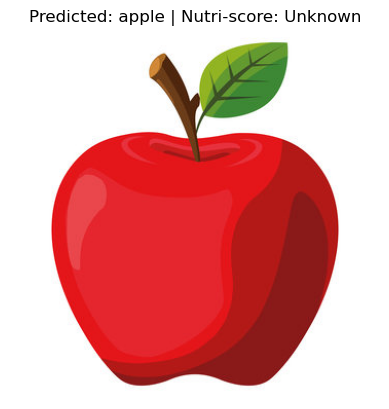

In [ ]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import torch.nn as nn

# ------------------ Device ------------------
device = "cuda" if torch.cuda.is_available() else "cpu"

# ------------------ Load model ------------------
from torchvision.models import resnet18, ResNet18_Weights

# Category mapping
categories = sorted([item for item in os.listdir("food_images") if not item.startswith('.')])
class_to_idx = {cat: idx for idx, cat in enumerate(categories)}
idx_to_class = {v: k for k, v in class_to_idx.items()}
print("Class mapping:", idx_to_class)

# Load model
num_classes = len(class_to_idx)
model = resnet18(weights=ResNet18_Weights.DEFAULT)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
model.load_state_dict(torch.load("food_resnet18.pth", map_location=device))
model = model.to(device)
model.eval()
print("Model loaded successfully!")

# ------------------ Image preprocessing ------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ------------------ Nutri-score mapping ------------------
nutri_map_inv = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}

# ------------------ Prediction function ------------------
def predict_image(img_path, model, transform, idx_to_class):
    if not os.path.exists(img_path):
        print("Error: file does not exist!")
        return

    # Load and preprocess image
    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    # Inference
    with torch.no_grad():
        output = model(img_tensor)
        probs = torch.softmax(output, dim=1).cpu().numpy()[0]
        pred_idx = np.argmax(probs)
        pred_class = idx_to_class[pred_idx]

    # Load JSON to get Nutri-score
    # JSON file assumed to be in the same structure as during training
    img_name = os.path.basename(img_path)
    for category in class_to_idx:
        label_path = os.path.join("food_images", category, "labels", img_name.replace(".jpg", ".json"))
        if os.path.exists(label_path):
            print(label_path)
            with open(label_path, "r") as f:
                data = json.load(f)
                nutri_score = data.get("nutri_score", "C").upper()
            break
    else:
        nutri_score = "Unknown"

    # Display results
    print("Predicted category:", pred_class)
    print("Category probabilities:", probs)
    print("Nutri-score from JSON:", nutri_score)

    # Show image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {pred_class} | Nutri-score: {nutri_score}")
    plt.show()

# ------------------ Example usage ------------------
img_path = input("/home/licongcong/Desktop/backup/apple_image.jpg")
predict_image(img_path, model, transform, idx_to_class)


/home/licongcong/Desktop/backup/water_bottle.jpeg /home/licongcong/Desktop/backup/water_bottle.jpeg


Predicted category: waters
Category probabilities: [0.00158407 0.37423128 0.01921813 0.6049665 ]
Nutri-score from JSON: Unknown


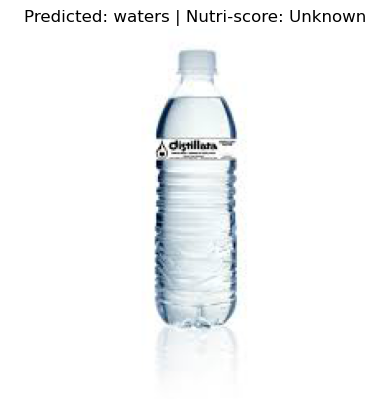

In [29]:
img_path = input("/home/licongcong/Desktop/backup/water_bottle.jpeg")
predict_image(img_path, model, transform, idx_to_class)

/home/licongcong/Desktop/backup/banana_image.jpg /home/licongcong/Desktop/backup/banana_image.jpg


Predicted category: banana
Category probabilities: [1.3767574e-03 9.9862278e-01 3.5122962e-08 4.9649481e-07]
Nutri-score from JSON: Unknown


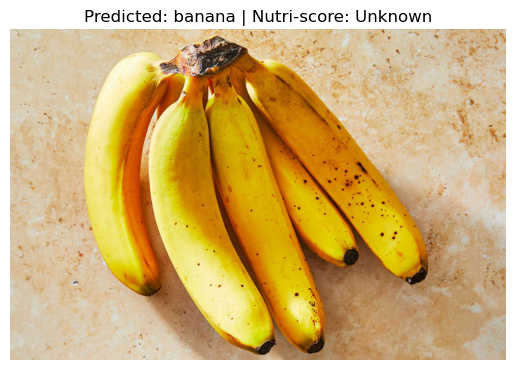

In [31]:
img_path = input("/home/licongcong/Desktop/backup/banana_image.jpg")
predict_image(img_path, model, transform, idx_to_class)

/home/licongcong/Desktop/backup/apple_juice.jpg /home/licongcong/Desktop/backup/apple_juice.jpg


Predicted category: apple
Category probabilities: [9.9643207e-01 3.4446444e-03 1.2158983e-04 1.5767670e-06]
Nutri-score from JSON: Unknown


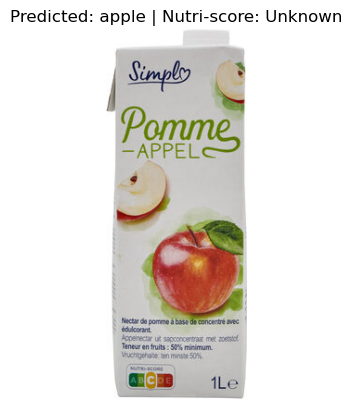

In [35]:
img_path = input("/home/licongcong/Desktop/backup/apple_juice.jpg")
predict_image(img_path, model, transform, idx_to_class)